In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2023-12-31'

stock = 'MSFT'
data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,26.549999,26.959999,26.389999,26.770000,21.200514,64731500
1,2012-01-04,26.820000,27.469999,26.780001,27.400000,21.699446,80516100
2,2012-01-05,27.379999,27.730000,27.290001,27.680000,21.921188,56081400
3,2012-01-06,27.530001,28.190001,27.530001,28.110001,22.261732,99455500
4,2012-01-09,28.049999,28.100000,27.719999,27.740000,21.968702,59706800
...,...,...,...,...,...,...,...
3013,2023-12-22,373.679993,375.179993,372.709991,374.579987,373.215393,17091100
3014,2023-12-26,375.000000,376.940002,373.500000,374.660004,373.295135,12673100
3015,2023-12-27,373.690002,375.059998,372.809998,374.070007,372.707275,14905400
3016,2023-12-28,375.369995,376.459991,374.160004,375.279999,373.912842,14327000


In [5]:
mva_100_days=data.Close.rolling(100).mean()

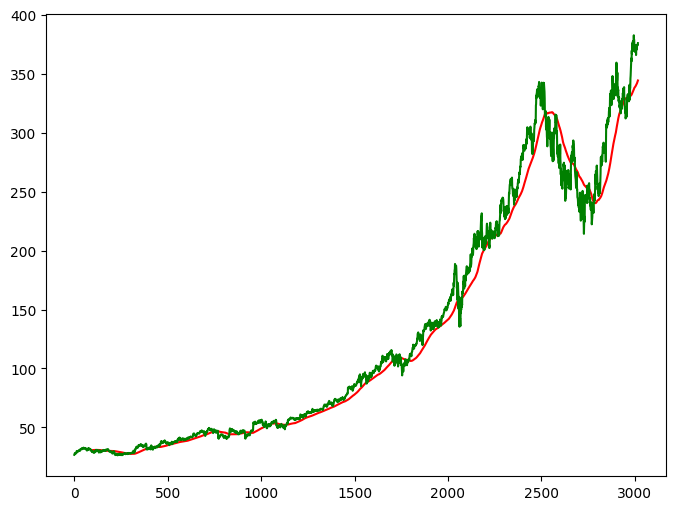

In [6]:
plt.figure(figsize=(8,6))
plt.plot(mva_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [7]:
mva_200_days=data.Close.rolling(200).mean()

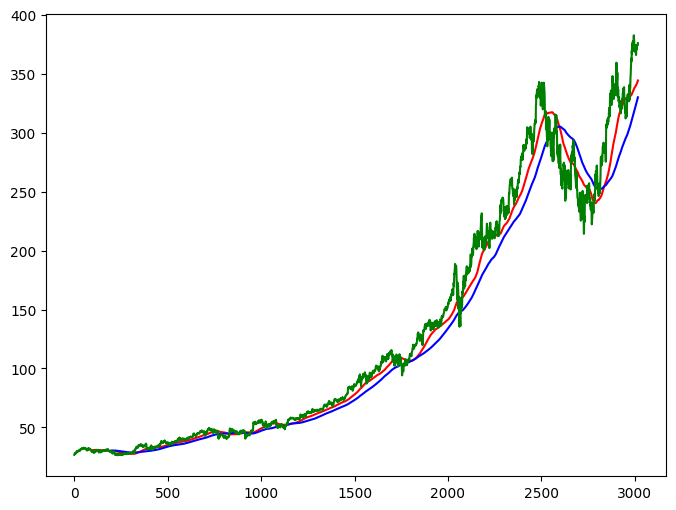

In [8]:
plt.figure(figsize=(8,6))
plt.plot(mva_100_days,'r')
plt.plot(mva_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2414

In [12]:
data_test.shape[0]

604

In [15]:
from sklearn.preprocessing import MinMaxScaler as mms
scaler = mms(feature_range=(0,1))


In [16]:
data_train_scale=scaler.fit_transform(data_train)

In [17]:
x=[]
y=[]

for i in range (100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [18]:
x, y = np.array(x), np.array(y)

In [20]:

import tensorflow.keras as keras
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential


In [23]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences =True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, return_sequences =False))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [24]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [25]:
model.fit(x,y, epochs = 50, batch_size = 32 , verbose = 1)

Epoch 1/50
73/73 [==============================] - 29s 203ms/step - loss: 0.0116
Epoch 2/50
73/73 [==============================] - 15s 206ms/step - loss: 0.0026
Epoch 3/50
73/73 [==============================] - 15s 207ms/step - loss: 0.0026
Epoch 4/50
73/73 [==============================] - 15s 206ms/step - loss: 0.0024
Epoch 5/50
73/73 [==============================] - 15s 206ms/step - loss: 0.0024
Epoch 6/50
73/73 [==============================] - 15s 205ms/step - loss: 0.0022
Epoch 7/50
73/73 [==============================] - 14s 198ms/step - loss: 0.0019
Epoch 8/50
73/73 [==============================] - 11s 152ms/step - loss: 0.0024
Epoch 9/50
73/73 [==============================] - 11s 156ms/step - loss: 0.0019
Epoch 10/50
73/73 [==============================] - 12s 160ms/step - loss: 0.0020
Epoch 11/50
73/73 [==============================] - 11s 154ms/step - loss: 0.0022
Epoch 12/50
73/73 [==============================] - 11s 155ms/step - loss: 0.0018
Epoch 13/50
7

In [26]:
pst_100_days=data_train.tail(100)

In [27]:
data_test=pd.concat([pst_100_days,data_test],ignore_index=True)

In [28]:
data_test_scale =  scaler.fit_transform(data_test)

In [29]:
x=[]
y=[]

for i in range (100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [30]:
y_predict = model.predict(x)

19/19 [==============================] - 3s 56ms/step


In [31]:
scale=1/scaler.scale_

In [32]:
y_predict=y_predict*scale

In [33]:
y=y*scale

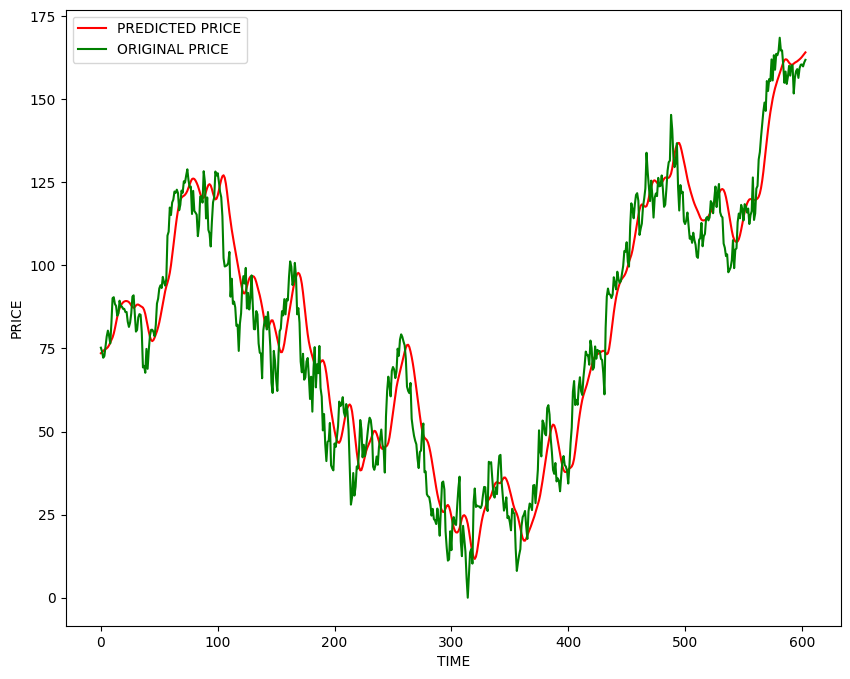

In [34]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='PREDICTED PRICE')
plt.plot(y,'g',label='ORIGINAL PRICE')
plt.xlabel('TIME')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [35]:
model.save('Stock Predictions Model.keras')